# Введение в теорию вероятностей и статистику


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Случайные переменные и распределения


In [8]:
sample = [ random.randint(0,10) for _ in range(130) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)} ({np.mean((sample-np.mean(sample))**2)})")
print(f"Std.dev = {np.std(sample)} ({np.sqrt(np.var(sample))})")

Sample: [3, 7, 5, 4, 5, 10, 0, 2, 9, 2, 2, 4, 7, 5, 10, 0, 8, 0, 5, 4, 0, 7, 10, 7, 8, 3, 8, 3, 4, 6, 3, 0, 4, 2, 9, 10, 4, 10, 5, 2, 7, 1, 5, 6, 8, 2, 6, 2, 1, 7, 10, 7, 9, 5, 0, 0, 0, 10, 10, 10, 3, 6, 7, 8, 6, 2, 8, 6, 8, 4, 7, 1, 3, 7, 6, 0, 9, 8, 8, 9, 0, 0, 5, 5, 6, 9, 10, 1, 4, 8, 2, 2, 9, 10, 9, 4, 7, 7, 10, 9, 1, 2, 5, 7, 4, 8, 1, 5, 3, 10, 3, 4, 5, 8, 6, 6, 3, 1, 9, 1, 8, 8, 4, 7, 1, 0, 9, 8, 2, 9]
Mean = 5.2615384615384615
Variance = 10.07005917159763 (10.07005917159763)
Std.dev = 3.173335653787294 (3.173335653787294)


Чтобы посмотреть на частоту появляения отдельных значений, можем построить **гистограмму**:

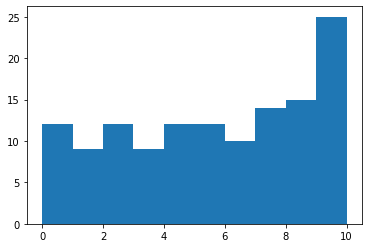

In [9]:
plt.hist(sample)
plt.show()

In [10]:
med = sorted(sample)[len(sample)//2]
print(f"Медиана = {med}")

Медиана = 5


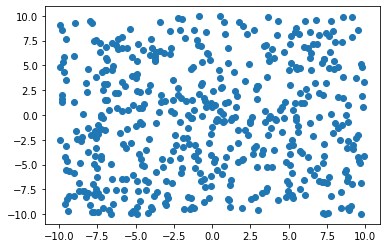

In [12]:
plt.scatter(np.random.uniform(-10,10,500),np.random.uniform(-10,10,500))

## Нормальное распределение и центральная предельная теорема

(array([ 3.,  6.,  4., 11., 10.,  9.,  2.,  2.,  2.,  1.]),
 array([4.18 , 4.392, 4.604, 4.816, 5.028, 5.24 , 5.452, 5.664, 5.876,
        6.088, 6.3  ]),
 <BarContainer object of 10 artists>)

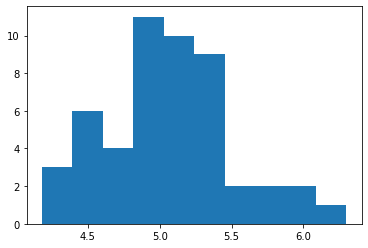

In [13]:
sample = [
    np.mean([ random.randint(0,10) for _ in range(50)])
    for _ in range(50)
]

plt.hist(sample)

In [15]:
for i in [1,5,10,20,30,50,100,1000,10000]:
    sample = [
    np.mean([ random.randint(0,10) for _ in range(i)])
    for _ in range(50)]
    print(f"{i} -> {np.mean(sample)}, {np.std(sample)}")

1 -> 5.82, 3.3026655900953696
5 -> 4.932, 1.355055718411608
10 -> 4.906000000000001, 1.0481240384610975
20 -> 4.9879999999999995, 0.797468494675495
30 -> 4.977333333333333, 0.4995749304269692
50 -> 4.988, 0.4152493226966181
100 -> 4.992, 0.3568977444591097
1000 -> 4.980440000000001, 0.09108021958691132
10000 -> 4.993805999999999, 0.030080567880277746


Для генерации нормального распределения есть специальные функции:

In [22]:
mean = 180
std = 10
generated = np.random.normal(mean, std, 10000)
generated[:20]

array([187.3410077 , 180.6269723 , 188.52906752, 185.81055974,
       171.42646354, 175.19614297, 186.58479088, 188.82162743,
       174.53898482, 186.44715657, 194.81643751, 186.78685088,
       192.4431425 , 184.4054247 , 179.31230306, 180.23393051,
       182.55923423, 177.80247948, 190.1436882 , 180.72833345])

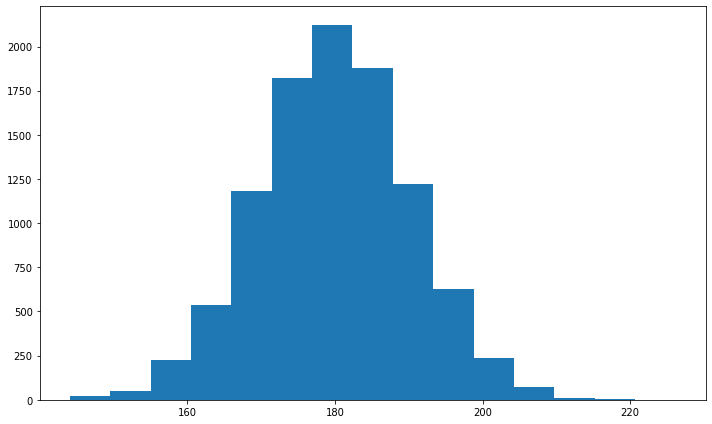

In [23]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

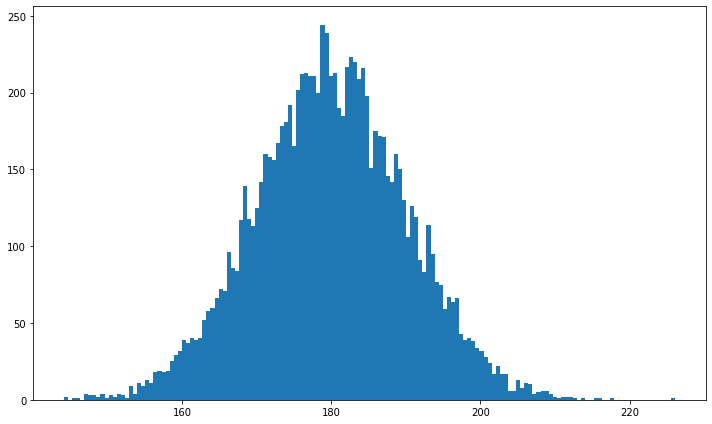

In [24]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=150)
plt.tight_layout()
plt.show()

## Смотрим на реальные данные

Посмотрим на данные о росте и весе игроков в бейсбол из датасета [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)

In [25]:
df = pd.read_csv("SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Height','Weight','Age'])
df

,Name,Team,Role,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


Переведём рост и вес в метрическую систему:

In [26]:
df['Height'] = df['Height']*2.54
df['Weight'] = df['Weight']*0.4536

In [29]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    187.191122
Weight     91.486246
dtype: float64

<AxesSubplot:>

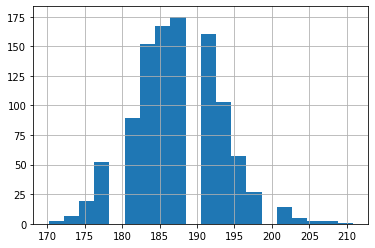

In [33]:
df['Height'].hist(bins=20)

Сконцентрируемся на росте:

In [ ]:
print(list(df['Height'])[:20])

In [34]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 187.1911218568668
Variance = 34.30185450014137
Standard Deviation = 5.856778508714613


Посмотрим на медиану и квартили с помощью **box plot**:

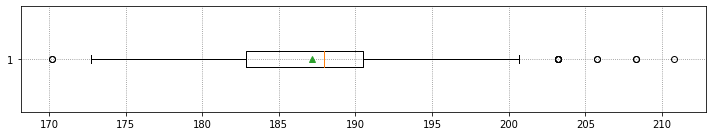

In [35]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Посмотрим, как эти данные меняются в зависимости от роли игрока:

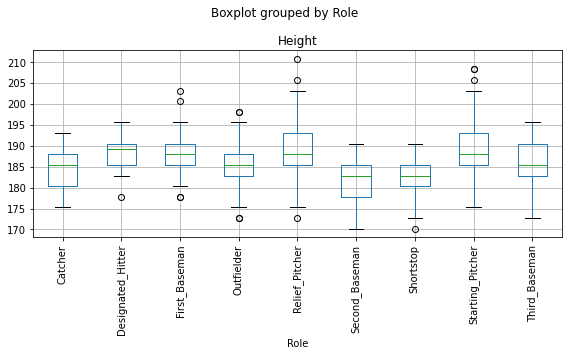

In [39]:
df.boxplot(column='Height', by='Role', figsize=(8,5))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

Посмотрим на распределение роста:

In [ ]:
df['Height'].hist(bins=15, figsize=(10,6))
plt.suptitle('Height distribution of MLB Players')
plt.xlabel('Height')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

> **Мораль:** Если нам нужно "моделировать" рост игроков, то нужно обязательно использовать нормальное распределение, а не просто псевдослучайные числа с равномерным распределением.

## Доверительные интервалы

У нашей выборки есть некоторый средний рост $H$. Среднеквардратичное отклонение показывает, насколько этот рост "разбросан":

In [40]:
df['Height'].mean(), df['Height'].std()

(187.1911218568668, 5.856778508714613)

Но это средний рост $H$, измеренный по нашей выборке. Насколько точно он описывает "настоящий" средний рост $\mu$ всей популяции?

> Точность прогноза зависит от количества изменений: чем больше измерений, тем точнее прогноз.

Формально это описывается с помощью понятия **доверительного интервала**: в каком интервале должен находиться рост, чтобы с вероятностью $p$ соответствовать настоящему среднему росту популяции $\mu$:
$$
P(H-\Delta\lt\mu\lt H+\Delta) = p
$$

Подробнее про то, как вычисляется доверительный интервал, можно прочитать [тут](https://en.wikipedia.org/wiki/Confidence_interval). Мы используем код [из этого обсуждения на stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [46]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Height'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 187.19 ± 0.26
p=0.90, mean = 187.19 ± 0.30
p=0.95, mean = 187.19 ± 0.36


Чем выше требуемая вероятность - тем шире доверительный интервал.

Давайте также посмотрим на разные роли игроков в нашем датасете. У каждой роли есть свой некоторый средний рост и вес:

In [ ]:
df.groupby('Role').agg({ 'Height' : 'mean', 'Weight' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Посчитаем доверительные интервалы для роста Designated Hitter и First Baseman:

In [47]:
for role in ['Designated_Hitter','First_Baseman']:
    m, h = mean_confidence_interval(df[df['Role']==role]['Height'].fillna(method='pad'))
    print(f"role={role}, mean = {m:.2f} ± {h:.2f}")

role=Designated_Hitter, mean = 188.52 ± 2.27
role=First_Baseman, mean = 187.96 ± 1.34


Мы видим, что для First Basemen есть больше примеров, поэтому доверительный интервал уже.

## Проверка гипотез

Попробуем проверить гипотезу, что First Basemen выше, чем Second Basemen. На первый взгляд достаточно сравнить средний рост:

(170.0, 190.0)

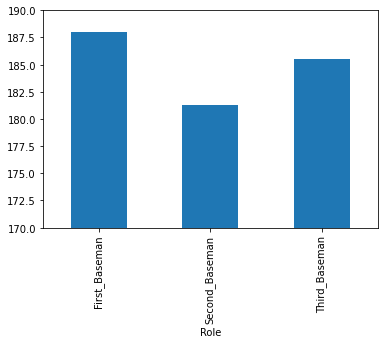

In [48]:
df[df['Role'].apply(lambda x: x.endswith('Baseman'))].groupby('Role').mean()['Height'].plot.bar()
plt.ylim(170,190)

Однако насколько статистически значима такая гипотеза? Что если в каждой роли по одному игроку - сможем ли мы при этом утверждать, что в целом для всей популяции такая гипотеза верна?

Первый вариант - проверить доверительные интервалы:

In [53]:
for p in [0.85,0.9,0.95,0.999]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Third_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 3rd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 186.98..188.94, 3rd basemen height: 184.35..186.72
Conf=0.90, 1st basemen height: 186.84..189.08, 3rd basemen height: 184.18..186.89
Conf=0.95, 1st basemen height: 186.62..189.30, 3rd basemen height: 183.91..187.16
Conf=1.00, 1st basemen height: 185.63..190.29, 3rd basemen height: 182.69..188.38


In [58]:
df.groupby('Role').agg({'Height' : 'mean', 'Age' : 'count'}).rename(columns={'Age': 'Count'})

,Height,Count
Role,,
Catcher,184.718158,76
Designated_Hitter,188.524444,18
First_Baseman,187.960000,55
Outfielder,185.446186,194
Relief_Pitcher,188.911492,315
Second_Baseman,181.259655,58
Shortstop,182.635769,52
Starting_Pitcher,189.787421,221
Third_Baseman,185.532889,45


Как мы видим, доверительные интервалы не пересекаются, отсюда можно сделать заключение, что гипотеза верна.

Однако к аналогичному результату можно прийти, используя **[t-тест Стьюдента](https://en.wikipedia.org/wiki/Student%27s_t-test)**:

In [61]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(
    df.loc[df['Role']=='First_Baseman',['Height']], 
    df.loc[df['Role']=='Third_Baseman',['Height']],equal_var=False)
print(f"T-statistics = {tstat[0]:.2f}\nP-value: {pval[0]}")

T-statistics = 2.32
P-value: 0.022856341575105545


Значения, которые возвращает функция `ttest_ind`:
* p-value - вероятность, с которой у двух распределений одинаковое среднее значение. В нашем случае - очень низкая.
* t-statistics - мера различия в средних значениях (подробнее [здесь](https://en.wikipedia.org/wiki/Student%27s_t-test))

## Корреляция и ковариация

Предположим, что в некоторой спортивной компании платят игрокам в зависимости от их роста. Формула для вычисления зарплаты следующая:

In [66]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(187.96, 1075.2469071629075), (187.96, 1075.2469071629075), (182.88, 1053.7477908306482), (182.88, 1053.7477908306482), (185.42000000000002, 1064.4973489967779), (175.26, 1021.4991163322593), (175.26, 1021.4991163322593), (180.34, 1042.9982326645186), (193.04, 1096.7460234951668), (180.34, 1042.9982326645186)]


Чтобы понять, что зарплата и рост меняются синхронно, вычисляют их ковариацию:
$$
\mathrm{cov}(X,Y) = E[(X-E[X])(Y-E[Y])]
$$

Поскольку ковариация зависит от дисперсии величин, то можно нормировать её на дисперсию - получим корреляцию (она меняется от -1 до 1):
$$
\mathrm{corr}(X,Y) = {\mathrm{cov}(X,Y)\over\sigma_X\sigma_Y}
$$

Посчитаем ковариацию и корреляцию:

In [67]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[ 34.3018545  145.16920479]
 [145.16920479 614.37197275]]
Covariance = 145.16920478558524
Correlation = 1.0


In [68]:
df.corr()

,Height,Weight,Age
Height,1.000000,0.531886,-0.073670
Weight,0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


Корреляция 1 означает, что есть **линейная зависимость** между переменными. Мы можем легко увидеть эту записимость на графике:

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Посмотрим, что будет в случае нелинейной зависимости:

In [87]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9835304456670811


Добавим сюда ещё немного случайности, чтобы замаскировать явную зависимость:

In [70]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9345054386687855


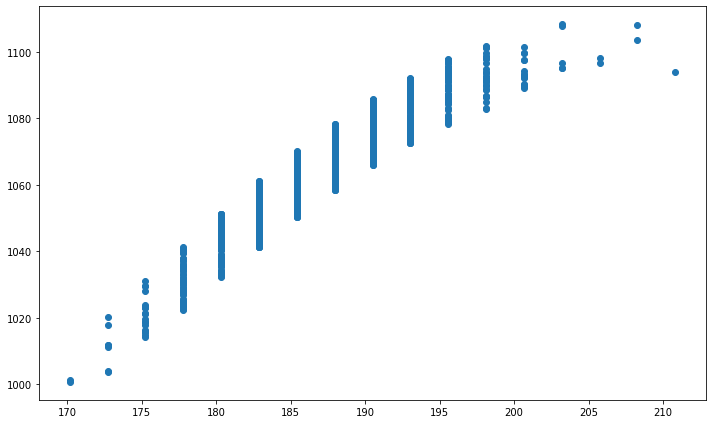

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

Мы посмотрели на корреляцию между ростом и искусственно вычисленной величиной. Теперь посмотрим, есть ли корреляция между весом и ростом: 

In [84]:
np.corrcoef(df['Height'],df['Weight'].fillna(value=df['Weight'].mean()))

array([[1.        , 0.53174622],
       [0.53174622, 1.        ]])

In [78]:
df[df['Weight'].isna()]

,Name,Team,Role,Height,Weight,Age
640,Kirk_Saarloos,CIN,Starting_Pitcher,182.88,NaN,27.77


Мы получили значения `nan`, поскольку в поле Weight были пропущенные значения. 

> Этот пример показывает важность **подготовки** и **очистки данных**.

Используем метод `fillna` для заполнения пропущенных значений: 

In [ ]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

Корреляция есть, но не такая сильная, как раньше. Это можно увидеть на графике:

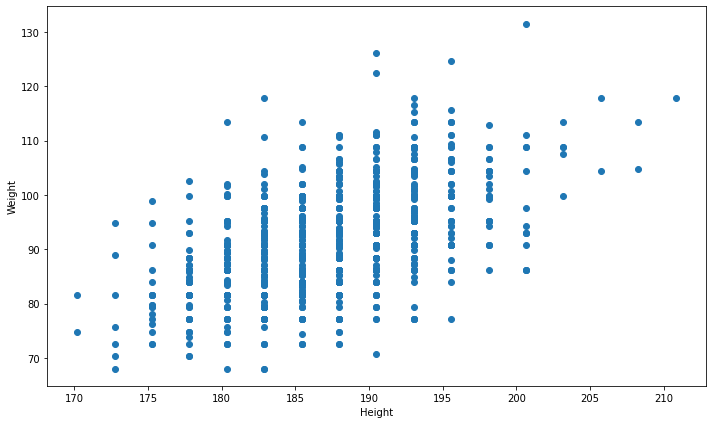

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()